<a href="https://colab.research.google.com/github/ameenattar92/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [76]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble

%matplotlib inline

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
path = '/content/drive/MyDrive/AlmaBetter Data Science/Capstone Projects/ Cardiovascular Risk Prediction/data_cardiovascular_risk.csv'

In [79]:
cvs_df = pd.read_csv(path , index_col = "id")

#1. Explorartory Data Analysis

In [80]:
#Checking the first five observations
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [81]:
#Checking the bottom five observations
cvs_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [82]:
#Checking the shape of our dataset
cvs_df.shape

(3390, 16)

In [83]:
#Looking at the info of our dataset
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [84]:
#Looking up for the detailed description of our dataset.
cvs_df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [85]:
#Renaming the column names
cvs_df.rename(columns = {'totChol' : 'Total_Cholestrol'}, inplace=True)
cvs_df.rename(columns = {'sysBP' : 'Systolic_BP'}, inplace=True)
cvs_df.rename(columns = {'diaBP' : 'Diastolic_BP'}, inplace=True)

In [86]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#Exploring the dependent variable

In [87]:
#Checking the Null values
cvs_df['TenYearCHD'].isnull().sum()

0

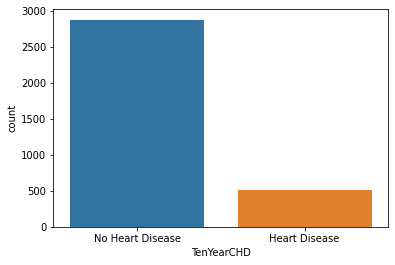

In [88]:
# visualizing the target variable
g = sns.countplot(cvs_df['TenYearCHD'])
g.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.show()

In [89]:
# Class count
class_count_0, class_count_1 = cvs_df['TenYearCHD'].value_counts()

# Separate class
class_0 = cvs_df[cvs_df['TenYearCHD'] == 0]
class_1 = cvs_df[cvs_df['TenYearCHD'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2879, 16)
class 1: (511, 16)




Now let's go ahead and check for the missing values in rest of the dataset

In [90]:
#Checking the missing values for whole dataset
missing_values = cvs_df.isnull()

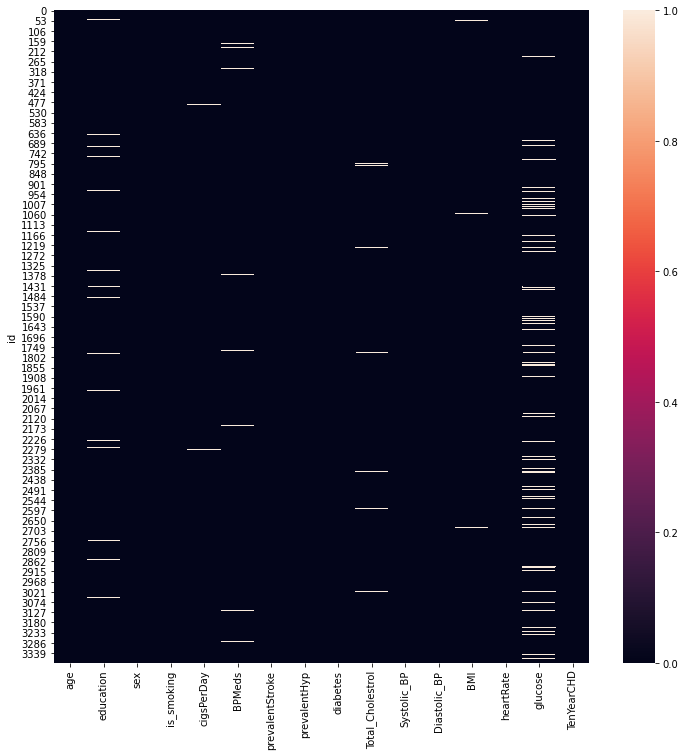

In [91]:
#Plotting the heatmap for missing values 

plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [92]:
# Summing up the missing values 
cvs_df.isnull().sum()


age                   0
education            87
sex                   0
is_smoking            0
cigsPerDay           22
BPMeds               44
prevalentStroke       0
prevalentHyp          0
diabetes              0
Total_Cholestrol     38
Systolic_BP           0
Diastolic_BP          0
BMI                  14
heartRate             1
glucose             304
TenYearCHD            0
dtype: int64

As we can see above the Glucose feature has the highest number of missing values followed by education, BPmeds, TotalCholestrol, CigsPerday, BMI & heartRate.

In [93]:
# Filling up the numerical NaN values using mode

cvs_df['education'].fillna(cvs_df['education'].mode()[0], inplace=True)
cvs_df['cigsPerDay'].fillna(cvs_df['cigsPerDay'].mode()[0], inplace=True)
cvs_df['BPMeds'].fillna(cvs_df['BPMeds'].mode()[0], inplace=True)
cvs_df['Total_Cholestrol'].fillna(cvs_df['Total_Cholestrol'].mode()[0], inplace=True)
cvs_df['glucose'].fillna(cvs_df['glucose'].mode()[0], inplace=True)
cvs_df['BMI'].fillna(cvs_df['BMI'].mode()[0], inplace=True)
cvs_df['heartRate'].fillna(cvs_df['heartRate'].mode()[0], inplace=True)

In [94]:
filled_NaN = cvs_df.isnull()

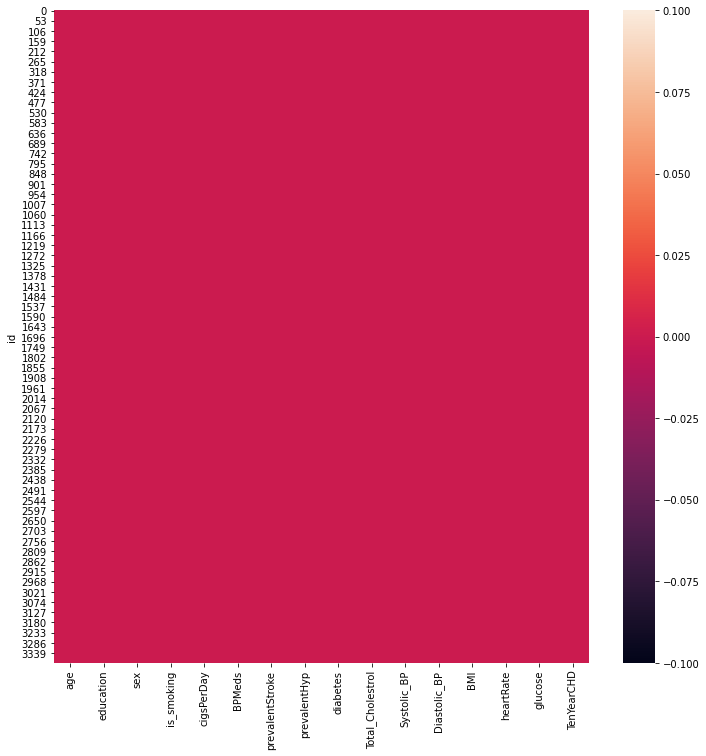

In [95]:
#Plotting the heatmap after treating the missing values
plt.figure(figsize=(12,12))
sns.heatmap(filled_NaN)

In [96]:
cvs_df.isnull().sum()

age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
Total_Cholestrol    0
Systolic_BP         0
Diastolic_BP        0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

As seen above all the missing values has been treated.

Now let's check the correlation between each feature.

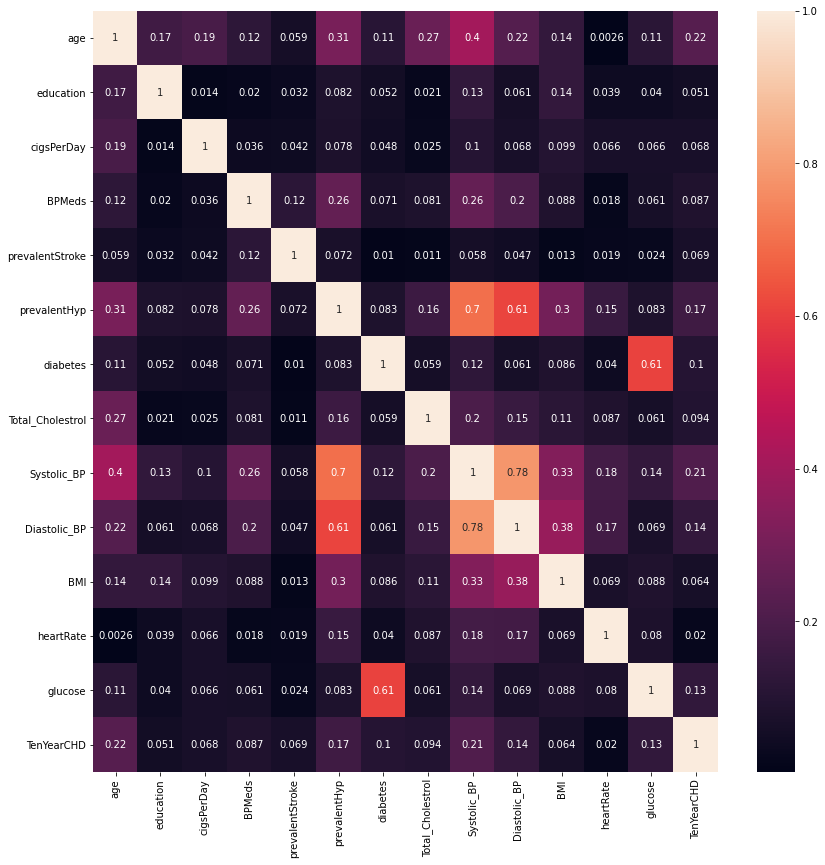

In [97]:
#Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = cvs_df.corr()
sns.heatmap(abs(correlation), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae9bd116d0>,
      dtype=object)

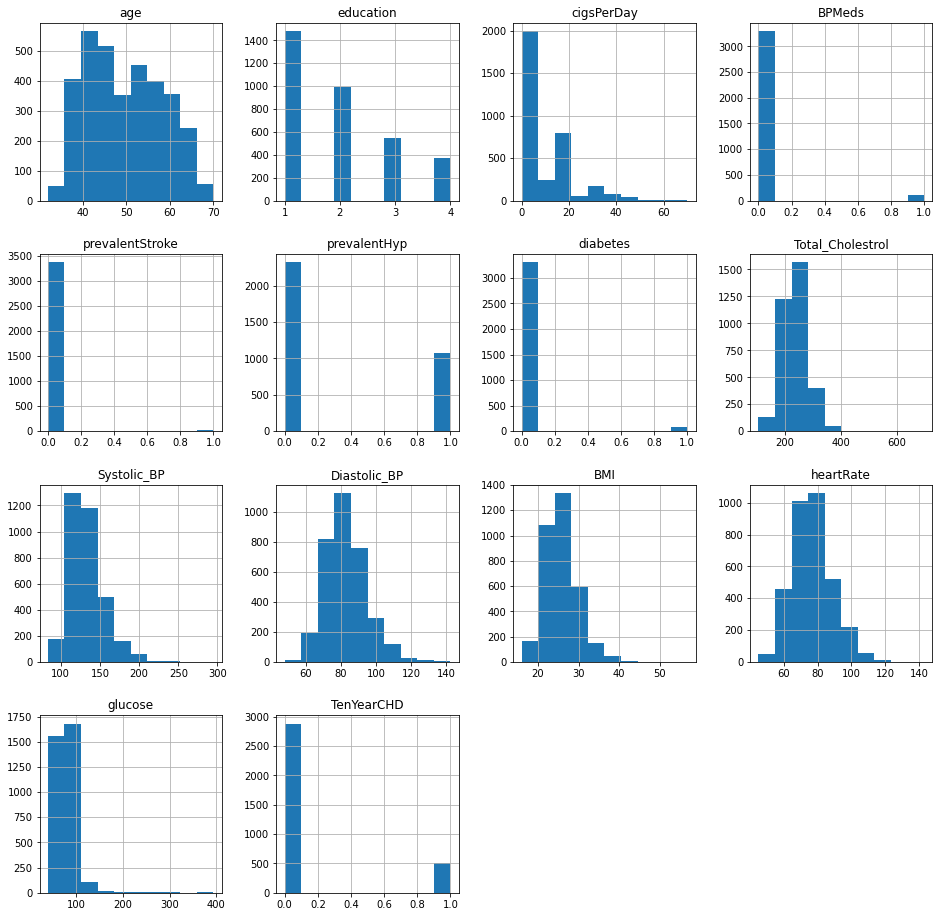

In [98]:
cvs_df.hist(figsize=(16,16))

#Analysing the categorical features

**Which Sex is prone to coronary heart disease?**

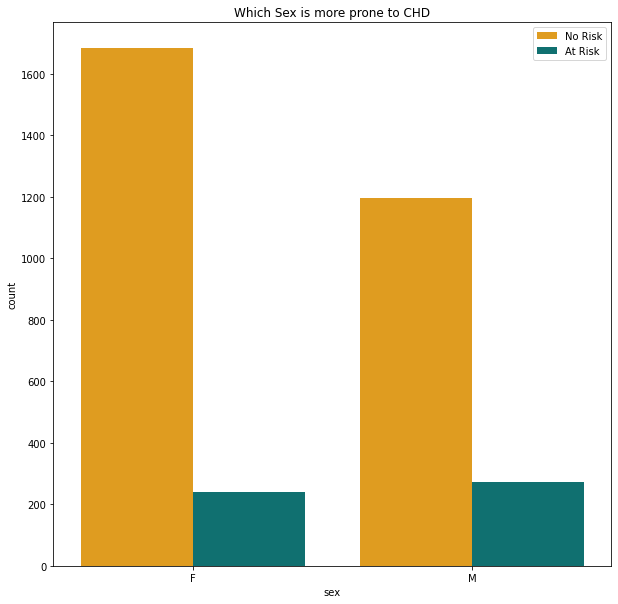

In [99]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['sex'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Which Sex is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are diabetic patients at more risk of coronary heart disease ??**

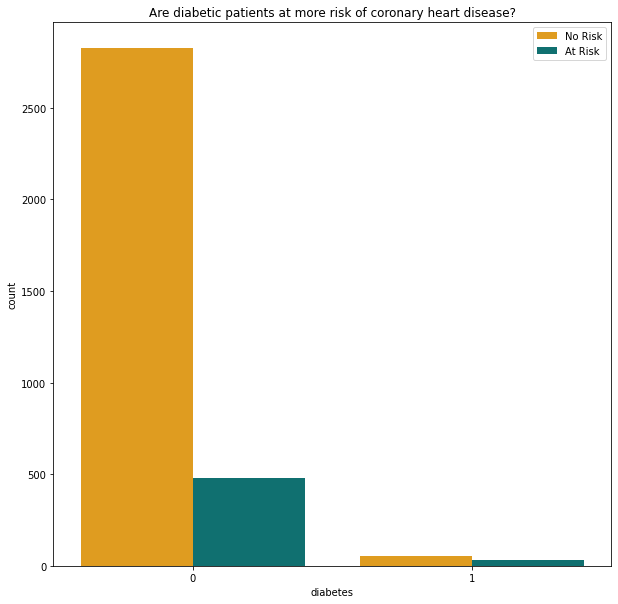

In [100]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['diabetes'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are smokers at more risk of coronary heart disease ??**

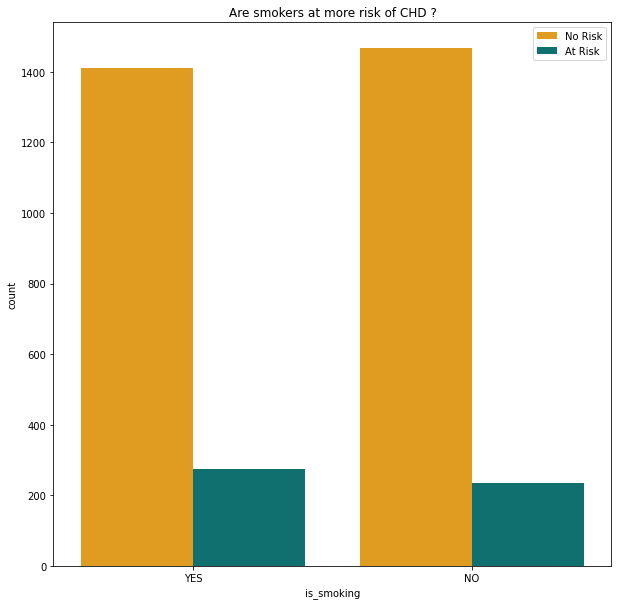

In [101]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['is_smoking'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are hypertensive patients at more risk of coronary heart disease ??**

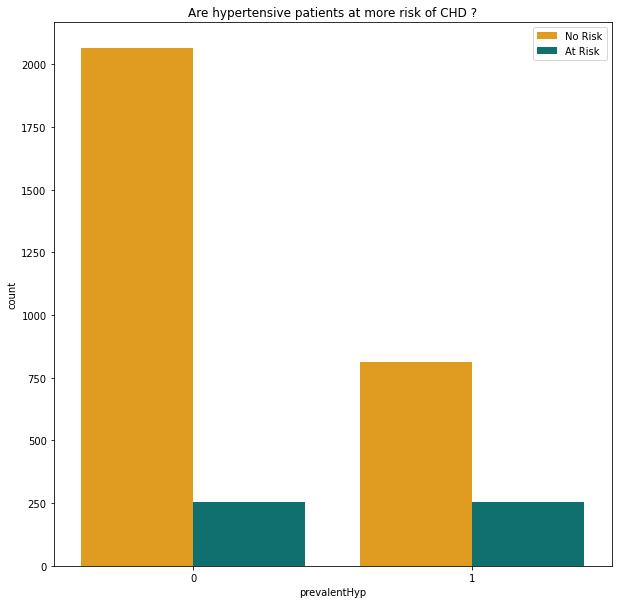

In [102]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['prevalentHyp'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are patients with blood pressure on medication at more risk of coronary heart disease ??**

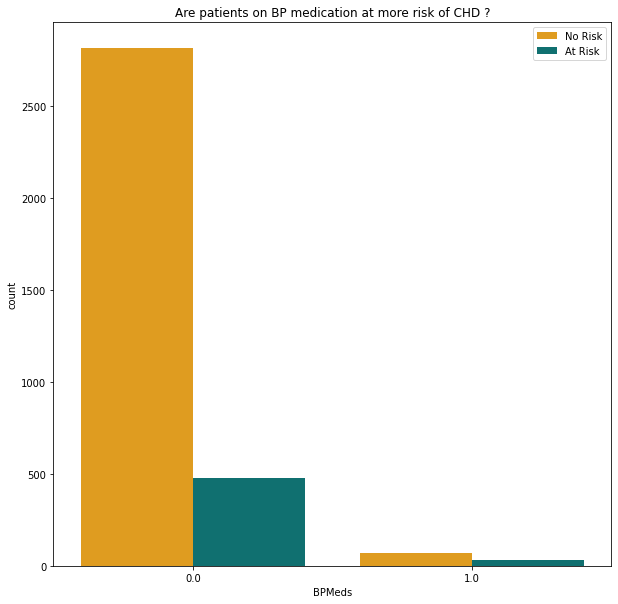

In [103]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['BPMeds'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Which Age group is more vulnerable to coronary heart disease ?**

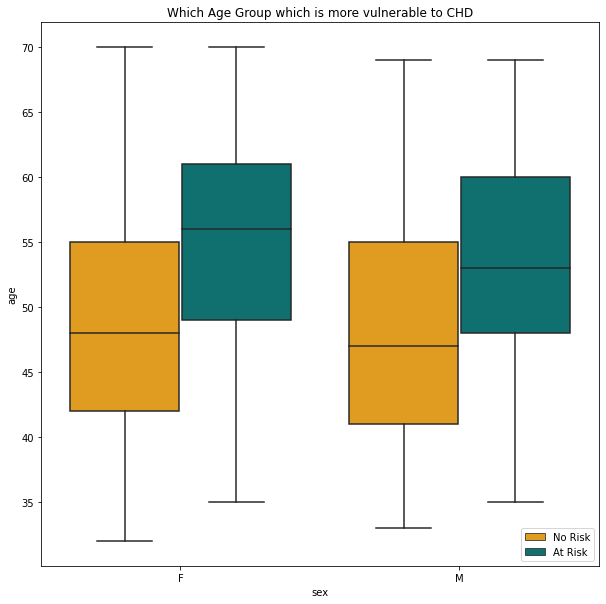

In [104]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = cvs_df['sex'], y = cvs_df['age'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

**Are Total Cholestrol levels related to coronary heart disease ??**

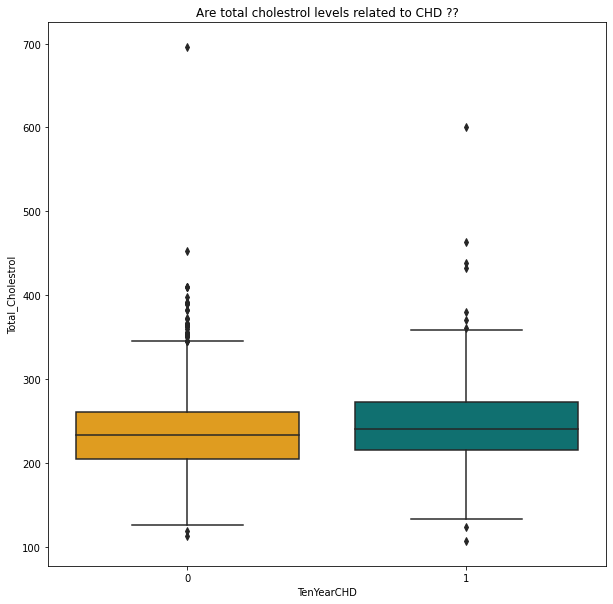

In [105]:
plt.figure(figsize = (10,10))
sns.boxplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], palette = my_palette)
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

**Let's take a deeper look into it.**

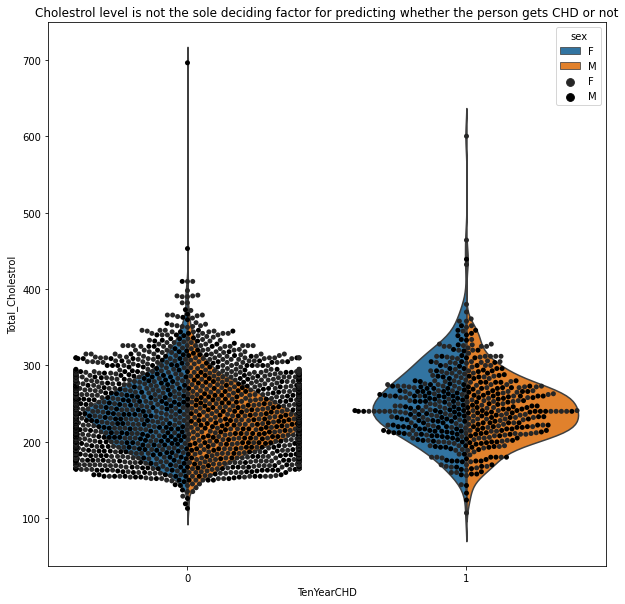

In [106]:
gender_palette = {'male' : 'teal', 'female' : 'orange'}
plt.figure(figsize = (10,10))
sns.violinplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], hue = cvs_df['sex'], split = True)
sns.swarmplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], color = 'black',hue = cvs_df['sex'])
plt.title("Cholestrol level is not the sole deciding factor for predicting whether the person gets CHD or not")
  
plt.show()

The above plot confirms the inference made above.

**Is Heart rate is responsible for CHD ??**

In [107]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [108]:
cvs_df['heartRate'] = cvs_df.apply(heartRate_data, axis = 1)

In [109]:
cvs_df['heartRate'].value_counts

<bound method IndexOpsMixin.value_counts of id
0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
3385    Normal
3386    Normal
3387    Normal
3388    Normal
3389    Normal
Name: heartRate, Length: 3390, dtype: object>

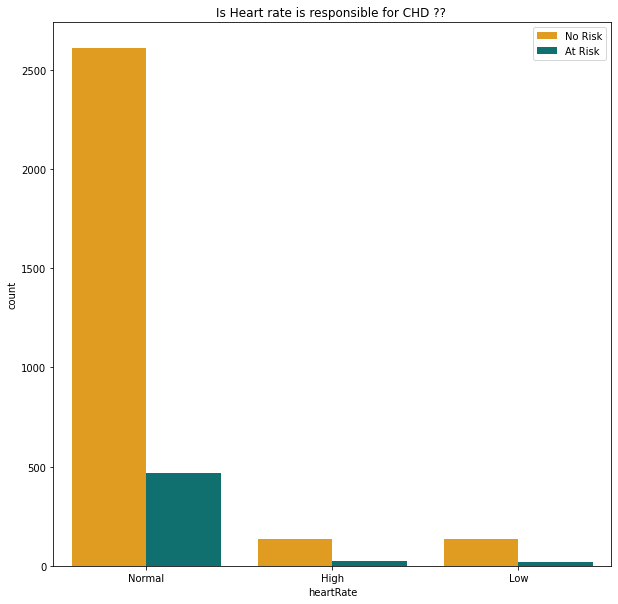

In [110]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['heartRate'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are Smokers more prone to CHD?**

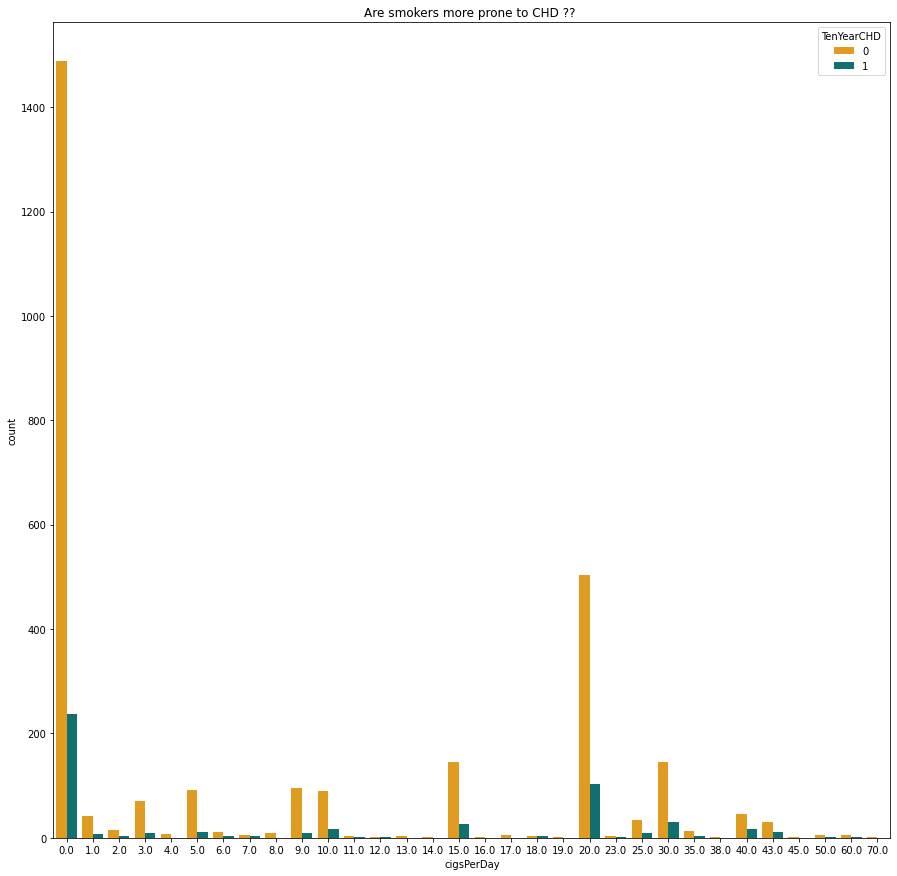

In [111]:
plt.figure(figsize = (15,15))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['cigsPerDay'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are smokers more prone to CHD ?? ")

plt.show()

**Whether a person who had a stroke earlier more prone to CHD?**

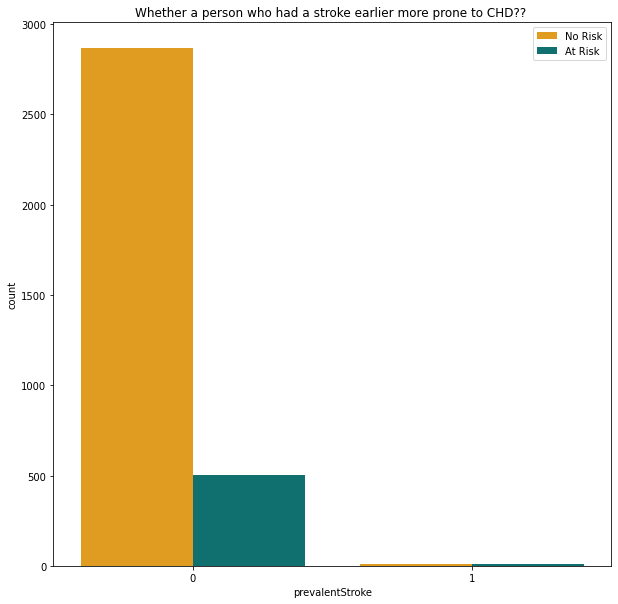

In [112]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['prevalentStroke'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

**Are patients with systolic BP at risk of CHD?**

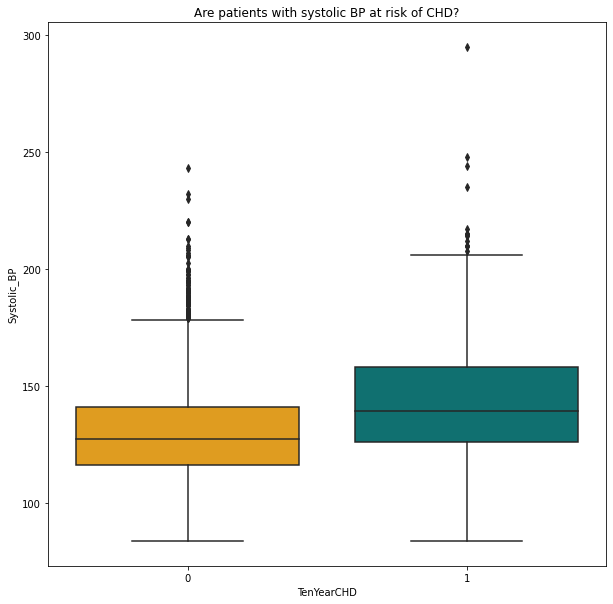

In [113]:
plt.figure(figsize = (10,10))
sns.boxplot(cvs_df['TenYearCHD'], cvs_df['Systolic_BP'], palette = my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

**Are patients with Diastolic BP at risk of CHD?**

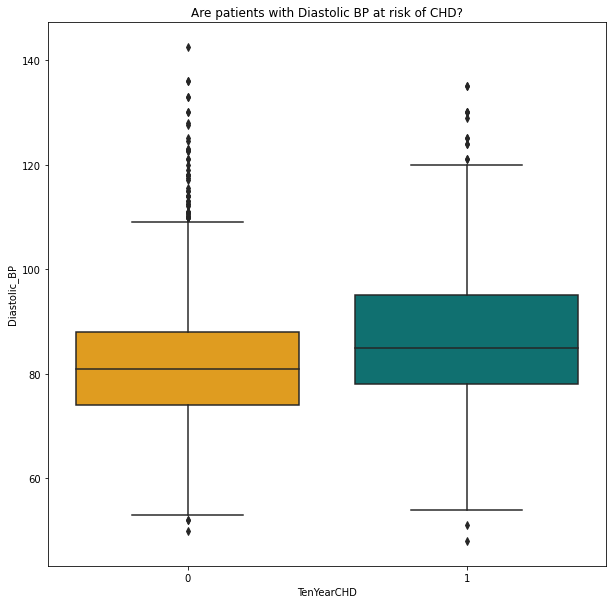

In [114]:
plt.figure(figsize = (10,10))
sns.boxplot(cvs_df['TenYearCHD'], cvs_df['Diastolic_BP'], palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

**Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.**

In [115]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,Normal,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,Normal,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,Normal,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,Normal,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,Normal,77.0,0


**Is patients BMI important to show the risk of CHD?**

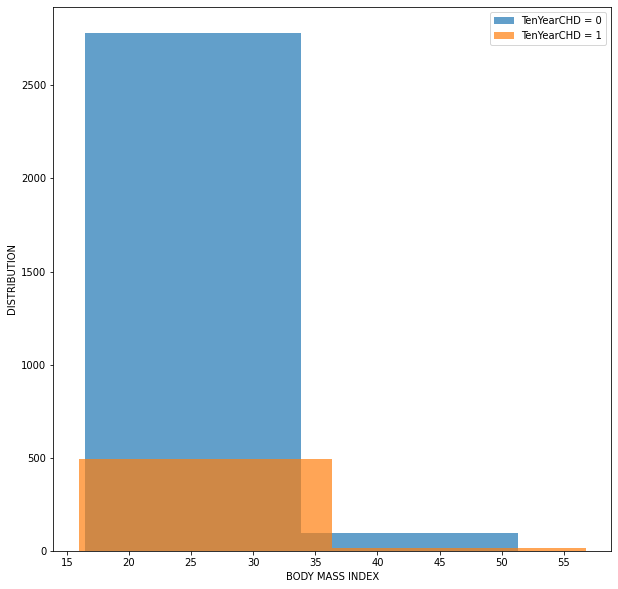

In [125]:
plt.figure(figsize=(10,10))

plt.hist(cvs_df['BMI'][cvs_df['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(cvs_df['BMI'][cvs_df['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('BODY MASS INDEX')
plt.legend()


**Can patients Glucose levels show the risk of CHD?**

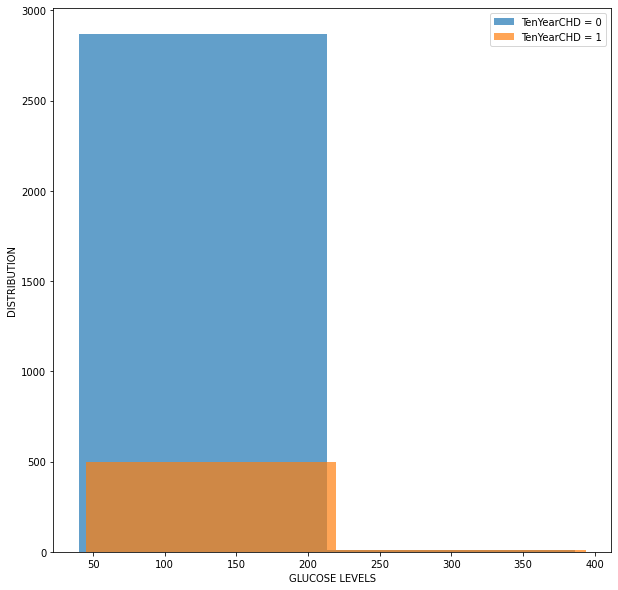

In [126]:
plt.figure(figsize=(10,10))

plt.hist(cvs_df['glucose'][cvs_df['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(cvs_df['glucose'][cvs_df['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('GLUCOSE LEVELS')
plt.legend()


#2. Model Building


## **Naive Bayes Classifier** 

Let's first build naive bayes classifier to ast as baseline model.

In [ ]:
# check datatype
cvs_df.info()

change categorical data from labels to numbers.

In [ ]:
# 1 = Male, 0 = Female
cvs_df['sex'] = cvs_df['sex'].apply(lambda x: 1 if x=='M' else 0)

# 1 = Yes, 0 = No
cvs_df['is_smoking'] = cvs_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
X = cvs_df.drop(columns=['TenYearCHD']).values
Y = cvs_df['TenYearCHD'].values

In [ ]:
# perform split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# build model and train it
naive_bayes_model = GaussianNB().fit(X_train,Y_train)

In [ ]:
# predict values
train_preds = naive_bayes_model.predict(X_train)
test_preds = naive_bayes_model.predict(X_test)

In [ ]:
print(confusion_matrix(Y_train, train_preds))
print(confusion_matrix(Y_test, test_preds))

In [ ]:
# Get the confusion matrix for train 
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for test 
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

Since Accuracy is not good measure we will check ROCAUC score

## **Knn**

Let's build knn to check how much score improves from naive bayes classifier.

In [ ]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, Y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, Y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, Y_test) 

In [ ]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

In [ ]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Webcan see that test score is increasing as number of neighbours increases.

Let's try to find best parameter for knn.

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

In [ ]:
knn_cv.best_score_

In [ ]:
knn_cv.best_params_

In [ ]:
plot_roc_curve(knn_cv,X,Y)
plt.title("Roc Auc Curve for kNN - " + str(knn_cv.best_params_['n_neighbors']))

# **Logistic Regression**

In [ ]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, Y_train)

In [ ]:
# Get the model coefficients
logistic_regression_model.coef_

In [ ]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,Y_train)
test_accuracy = accuracy_score(test_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

Even Logistic Regression is not performing better, This is due to imbalance dataset.
We have large number of record that are not at risk and less number of records that are at risk of future coronary heart disease.

Let's Resample the dataset to over come this imbalance.
We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

In [ ]:
smote = SMOTE()
# fit predictor and target variable
X_balanced, Y_balanced = smote.fit_resample(cvs_df.iloc[:,0:-1], cvs_df['TenYearCHD'])

In [ ]:
print('Original dataset shape', cvs_df.shape)
print('Resampled dataset shape', X_balanced.shape)

In [ ]:
# visualizing the target variable after resample
g = sns.countplot(Y_balanced)
g.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.show()

Now we have balanced dataset so we can apply logistic regression on balanced dataset

In [ ]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=0)

In [ ]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, Y_train)

In [ ]:
# Get the model coefficients
logistic_regression_model.coef_

In [ ]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,Y_train)
test_accuracy = accuracy_score(test_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

Our accuracy score is decreased but ROCAUC score improved.
Let's try tree based algorithm to solve this problem.

### Building Desicion Tree Model
Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [ ]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="gini",max_leaf_nodes= 10,random_state=0)
decision_tree_model.fit(X_train,Y_train)

## Predicting on test cell and train cell

In [ ]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [ ]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(Y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(Y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#classification report for train
print(classification_report(Y_train, train_preds))

In [ ]:
#classification report for test
print(classification_report(Y_test, test_preds))

## Building Ensembles of Decision Tree


In [ ]:
classifier = RandomForestClassifier(n_estimators=30,max_depth=20,random_state=30,min_samples_split=3,criterion='entropy')

In [ ]:
classifier.fit(X_train,Y_train)

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

Finding the accuracy and Roc_Auc score

In [ ]:
accuracy_score(Y_train,train_preds)

In [ ]:
accuracy_score(Y_test,test_preds)

In [ ]:
roc_auc_score(Y_test,test_preds)

In [ ]:
roc_auc_score(Y_train,train_preds)

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#classification report for train
print(classification_report(Y_train, train_preds))

In [ ]:
#classification report for test
print(classification_report(Y_test, test_preds))

In [ ]:
# Gradient Boost Classifier
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [ ]:
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [ ]:
gradientBC.fit(X_train,Y_train)

In [ ]:
train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

The accuracy and Roc_Auc Score

In [ ]:
accuracy_score(Y_train,train_preds)

In [ ]:
accuracy_score(Y_test,test_preds)

In [ ]:
roc_auc_score(Y_test,test_preds)


In [ ]:
roc_auc_score(Y_train,train_preds)

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
plot_roc_curve(gradientBC,X,Y)
plt.title("Roc Auc Curve for Gradient Boosting Classifier")

classification repost of train and test

In [ ]:
print(classification_report(Y_test, test_preds))
print('\n')
print(classification_report(Y_train, train_preds))

In [ ]:
#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [ ]:
xg_cla.fit(X_test,Y_test)

In [ ]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [ ]:
accuracy_score(Y_train,train_preds)

In [ ]:
accuracy_score(Y_test,test_preds)

In [ ]:
roc_auc_score(Y_test,test_preds)

In [ ]:
roc_auc_score(Y_train,train_preds)

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Classifucation Repost For train and test

In [ ]:
print(classification_report(Y_test, test_preds))
print('\n')
print(classification_report(Y_train, train_preds))

Visualising the tree

In [ ]:
ax = xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(100, 10)
plt.show()

In [ ]:
orig_feature_names = list(cvs_df.columns)
orig_feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()